# Clustering and Dimensionality Reduction Exam
Welcome to the weekly project on clustering and dimensionality reduction. You will be working with a dataset of traffic accidents.

## Dataset
The dataset that will be used in this task is `Traffic_Accidents.csv`

## Instructions
- Follow the steps outlined below.
- Write your code in the empty code cells.
- Comment on your code to explain your reasoning.

## Dataset Overview
The dataset contains information about traffic accidents, including location, weather conditions, road conditions, and more. Below are sample of these columns:

* `Location_Easting_OSGR`: Easting coordinate of the accident location.
* `Location_Northing_OSGR`: Northing coordinate of the accident location.
* `Longitude`: Longitude of the accident site.
* `Latitude`: Latitude of the accident site.
* `Police_Force`: Identifier for the police force involved.
* `Accident_Severity`: Severity of the accident.
* `Number_of_Vehicles`: Number of vehicles involved in the accident.
* `Number_of_Casualties`: Number of casualties in the accident.
* `Date`: Date of the accident.
* `Day_of_Week`: Day of the week when the accident occurred.
* `Speed_limit`: Speed limit in the area where the accident occurred.
* `Weather_Conditions`: Weather conditions at the time of the accident.
* `Road_Surface_Conditions`: Condition of the road surface during the accident.
* `Urban_or_Rural_Area`: Whether the accident occurred in an urban or rural area.
* `Year`: Year when the accident was recorded.
* Additional attributes related to road type, pedestrian crossing, light conditions, etc.

## Goal
The primary goal is to analyze the accidents based on their geographical location.


## Import Libraries

In [169]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans



## Load the Data

In [170]:
df = pd.read_csv('/Users/a/T5_SAD/Traffic_Accidents.csv')

## Exploratory Data Analysis (EDA)
Perform EDA to understand the data better. This involves several steps to summarize the main characteristics, uncover patterns, and establish relationships:
* Find the dataset information and observe the datatypes.
* Check the shape of the data to understand its structure.
* View the the data with various functions to get an initial sense of the data.
* Perform summary statistics on the dataset to grasp central tendencies and variability.
* Check for duplicated data.
* Check for null values.

And apply more if needed!


In [171]:
df.head()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,...,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year
0,560530.0,103950.0,0.277298,50.812789,47,3.0,1,1.0,27/11/2009,6,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Raining with high winds,Flood (Over 3cm of water),2.0,Yes,2009
1,508860.0,187170.0,-0.430574,51.572846,1,3.0,2,1.0,10/10/2010,1,...,6,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,1.0,Yes,2010
2,314460.0,169130.0,-3.231459,51.414661,62,3.0,2,1.0,14/09/2005,4,...,3,4055,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,2005
3,341700.0,408330.0,-2.881800,53.568318,4,3.0,1,2.0,18/08/2007,7,...,6,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,1.0,Yes,2007
4,386488.0,350090.0,-2.203020,53.047882,21,3.0,2,2.0,06/08/2013,3,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,2013


In [172]:
df['Number_of_Casualties'].fillna(df['Number_of_Casualties'].mean(),inplace=True)
df['Accident_Severity'].fillna(df['Accident_Severity'].mean(), inplace=True)


/var/folders/7r/v4vyqvts0yqc6_4x0lbrg3200000gn/T/ipykernel_4056/2840830406.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Number_of_Casualties'].fillna(df['Number_of_Casualties'].mean(),inplace=True)
/var/folders/7r/v4vyqvts0yqc6_4x0lbrg3200000gn/T/ipykernel_4056/2840830406.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on w

In [173]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52000 entries, 0 to 51999
Data columns (total 26 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Location_Easting_OSGR                        52000 non-null  float64
 1   Location_Northing_OSGR                       52000 non-null  float64
 2   Longitude                                    52000 non-null  float64
 3   Latitude                                     52000 non-null  float64
 4   Police_Force                                 52000 non-null  int64  
 5   Accident_Severity                            52000 non-null  float64
 6   Number_of_Vehicles                           52000 non-null  int64  
 7   Number_of_Casualties                         52000 non-null  float64
 8   Date                                         52000 non-null  object 
 9   Day_of_Week                                  52000 non-null  int64  
 10

In [ ]:
df['Light_Conditions'].fillna(df['Light_Conditions'].mode()[0], inplace=True)
df['Urban_or_Rural_Area'].fillna(df['Urban_or_Rural_Area'].mode()[0], inplace=True)

In [176]:
df.isna().sum()

Location_Easting_OSGR                          0
Location_Northing_OSGR                         0
Longitude                                      0
Latitude                                       0
Police_Force                                   0
Accident_Severity                              0
Number_of_Vehicles                             0
Number_of_Casualties                           0
Date                                           0
Day_of_Week                                    0
Local_Authority_(District)                     0
Local_Authority_(Highway)                      0
1st_Road_Class                                 0
1st_Road_Number                                0
Road_Type                                      0
Speed_limit                                    0
2nd_Road_Class                                 0
2nd_Road_Number                                0
Pedestrian_Crossing-Human_Control              0
Pedestrian_Crossing-Physical_Facilities        0
Light_Conditions    

## Data Preprocessing
Do what you think you need such as:
* Remove the outliers
* Impute missing data
* Scale the data
* Reduce dimentions using PCA
* Implement One-Hot Encoding for nominal categorical variables.

In [177]:
one_hot = make_pipeline(OneHotEncoder())
Ordinal = make_pipeline(OrdinalEncoder())
num_pip = make_pipeline(StandardScaler())

pipe_line = ColumnTransformer([
    ('One-Hot-Encoding',one_hot, ['Road_Type','Pedestrian_Crossing-Physical_Facilities','Road_Surface_Conditions','Did_Police_Officer_Attend_Scene_of_Accident']),
    ('Ordinal Encoding', Ordinal, ['Light_Conditions' ]),
    ('Numerical Scaling', num_pip, df.select_dtypes(include=[np.number, 'float64','int64' ]).columns),
    ('drop','drop',['Date', 'Location_Easting_OSGR', 'Location_Northing_OSGR','Weather_Conditions','Pedestrian_Crossing-Human_Control','Local_Authority_(Highway)' ])
]
)


## Feature Selection
Select relevant features for clustering. Explain your choice of features.


> I will do two methods to select features:

1. PCA 
2. Manualy 

In [178]:

pca = PCA(n_components=2)
df_pro = pipe_line.fit_transform(df)
df_pca = pca.fit_transform(df_pro)

## Data Visualization
Visualize the data using appropriate plots to gain insights into the dataset. Using the following:
- Scatter plot of accidents based on Longitude and Latitude.

In [179]:
one_hot = make_pipeline(OneHotEncoder())
Ordinal = make_pipeline(OrdinalEncoder())
num_pip = make_pipeline(StandardScaler())

pipe_line_2 = ColumnTransformer([
    ('Ordinal Encoding', Ordinal, ['Light_Conditions','Road_Type','Pedestrian_Crossing-Physical_Facilities','Road_Surface_Conditions','Did_Police_Officer_Attend_Scene_of_Accident']),
    ('Numerical Scaling', num_pip, df.select_dtypes(include=[np.number, 'float64','int64' ]).columns),
    ('drop','drop',['Date', 'Location_Easting_OSGR', 'Location_Northing_OSGR','Weather_Conditions','Pedestrian_Crossing-Human_Control','Local_Authority_(Highway)' ])
]
)

df_pca_2 = pca.fit_transform(pipe_line_2.fit_transform(df))

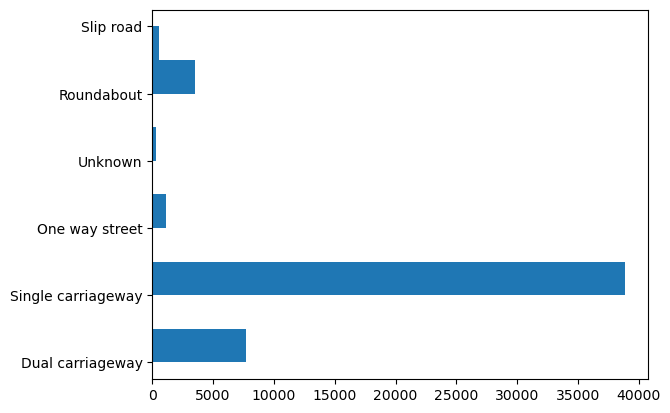

In [160]:
plt.hist( df['Road_Type'], orientation='horizontal')
plt.show()

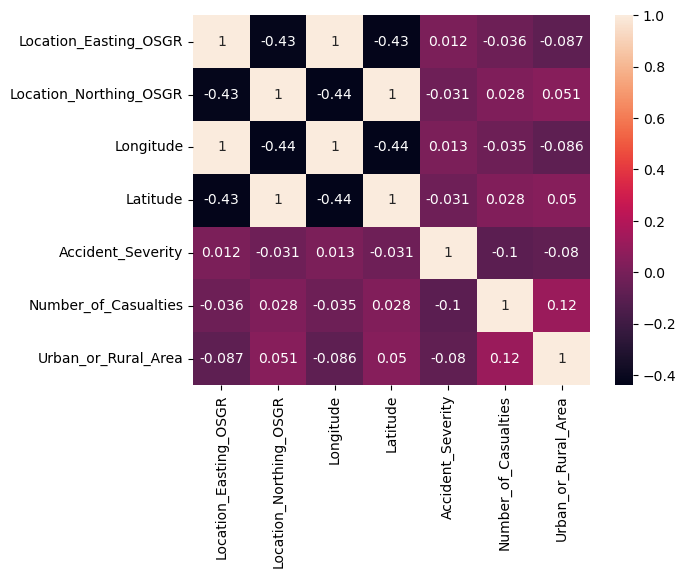

In [199]:
df2 = df.copy()
df_vitual = pd.DataFrame(df2.select_dtypes('float64','int64'), columns=df2.select_dtypes('float64','int64').columns)
sns.heatmap(df_vitual.corr(), annot=True)
plt.show()

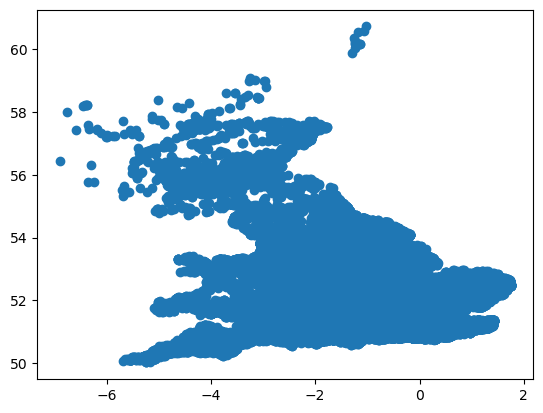

In [19]:
plt.scatter(df['Longitude'], df['Latitude'])

It shows the gemutric information about the dataset.

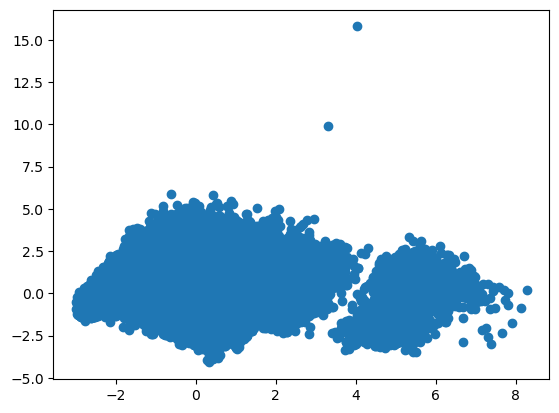

In [146]:
plt.scatter(df_pca[:,0], df_pca[:,1])
plt.show()

## Clauter number 3
- Modifing the preprocessing methods 

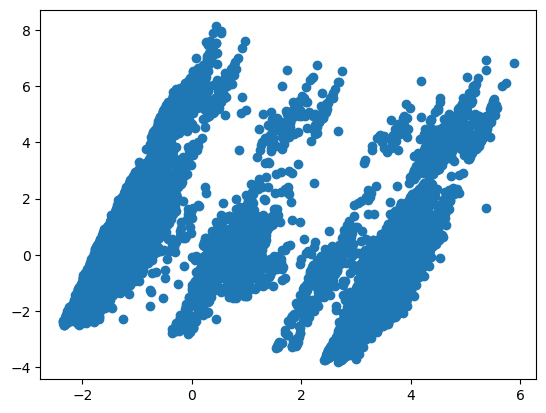

In [147]:
plt.scatter(df_pca_2[:,0], df_pca_2[:,1])

### Elbow Method

In [149]:
wcss_2 = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(df_pca_2)
    wcss_2.append(kmeans.inertia_)

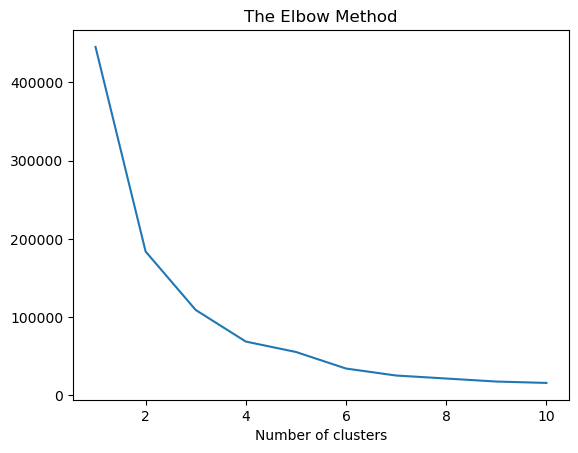

In [150]:
plt.plot(range(1, 11), wcss_2)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.show()

3 is the best fit (the last big decrease )

### Evaluation

In [151]:
# For K-means the best metric is distance between data points and their assigned cluster center.
kmeans_3 = KMeans(n_clusters=4, random_state=0)
kmeans_3.fit(df_pca_2)
print(kmeans_3.inertia_)
# the number does not have a meaning on its own we need to compare it with other n_cluster but that has been done above already 

# then we will apply Silhouette Coefficient
from sklearn.metrics import silhouette_score

print(silhouette_score(df_pca_2, kmeans_3.labels_))

68788.67775783266
0.5957194010547431


### Plot the data points with their predicted cluster center

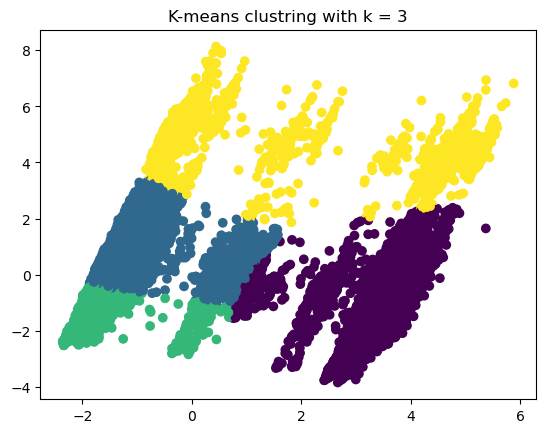

In [152]:
y_kmeans_3 = kmeans_3.fit_predict(df_pca_2)
plt.scatter(df_pca_2[:,0], df_pca_2[:,1], c=y_kmeans_3)
plt.title('K-means clustring with k = 3')
plt.show()

## Clustering
Apply K-Means clustering. Determine the optimal number of clusters and justify your choice.
* Find the `n_clusters` parameter using the elbow method.
* Train the model.

In [84]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(df_pca)
    wcss.append(kmeans.inertia_)


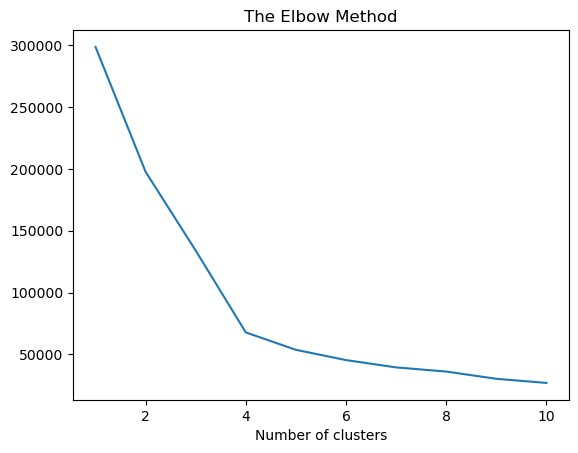

In [86]:
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.show()

4 is the best fit the last big decrease 

## Evaluation
Evaluate the clustering result using appropriate metrics.


In [92]:
# For K-means the best metric is distance between data points and their assigned cluster center.
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(df_pca)
print(kmeans.inertia_)
# the number does not have a meaning on its own we need to compare it with other n_cluster but that has been done above already 

# then we will apply Silhouette Coefficient
from sklearn.metrics import silhouette_score

print(silhouette_score(df_pca, kmeans.labels_))

67792.22849617661
0.4871634096246147


## Plot the data points with their predicted cluster center

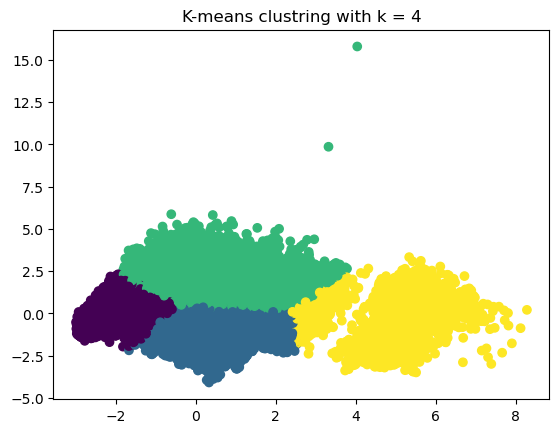

In [91]:

y_kmeans = kmeans.fit_predict(df_pca)
plt.scatter(df_pca[:,0], df_pca[:,1], c=y_kmeans)
plt.title('K-means clustring with k = 4')
plt.show()

## Clusting 2 Selection

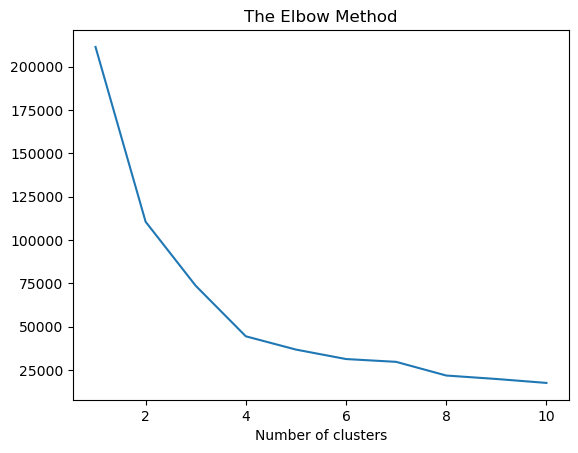

In [100]:
selected_data = df.iloc[:,[2,3]]


wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(selected_data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.show()

the same caes as above the best fit is 4 

### Evaluation 


In [101]:
kmeans_2 = KMeans(n_clusters=4, random_state=0)
kmeans_2_ = kmeans_2.fit(selected_data)
print(kmeans_2.inertia_)

from sklearn.metrics import silhouette_score

print(silhouette_score(selected_data, kmeans_2.labels_))

44500.711678875974
0.5336772136214187


### Ploting the rclusters with thier colors

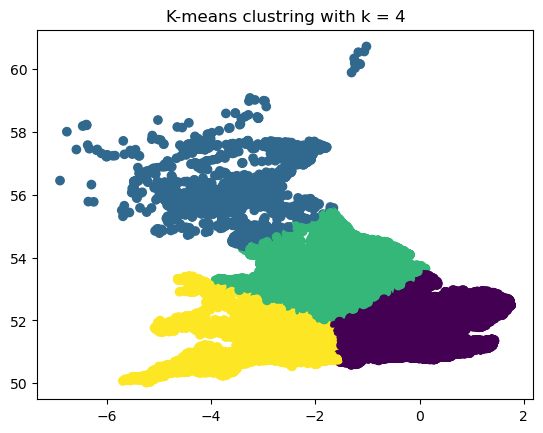

In [110]:
y_kmeans_2 = kmeans_2.fit_predict(selected_data)
plt.scatter(selected_data.iloc[:,0], selected_data.iloc[:,1], c=y_kmeans_2)
plt.title('K-means clustring with k = 4')
plt.show()

Based on the metric we got better results 
and the sapartion I think it is better

## Exam Questions
* **Justify Your Feature Selection:**
   - Which features did you choose for clustering and why?
      - I used PCA to visualize the data in 2D. it keeps the highest variance. 

* **Number of Clusters Choices:**
   - How did you determine the optimal number?
      - Based on the Elbow method choosing the last big decrease.
   
* **Evaluation:**
   - Which metrics did you use to evaluate the clustering results, and why?
      - Distance between data points and their assigned cluster center but its output is not interprtable that is why I used Silhouette Coefficient which counts the distance between the point and its cluster points avg, and the point with the nearst cluster points avg (not its cluster) divided by max(of both distance)

   - How do these metrics help in understanding the effectiveness of your clustering approach?
      - if the distence betwee the points and thier cluster center is low this means that our center is in the right place.
      - Silhouette till us the saparation of the data if it is high this means the data are well separated.
   
* **Improvements and Recommendations:**
   - Suggest any improvements or future work that could be done with this dataset. What other methods or algorithms would you consider applying?
      - Maybe using other clustring method could improve the results. some problems need so features so this my help the results by slecting better features